<a href="https://colab.research.google.com/github/allanspadini/livro-val-allan/blob/main/capitulo3/capitulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Capítulo 3 - Aprofundando nas previsões**

In [ ]:
df_treino = pd.DataFrame()

In [ ]:
df_treino['ds'] = dados_br['Data'][:2000]
df_treino['y'] = dados_br['Temperatura'][:2000]

In [ ]:
df_teste = pd.DataFrame()

In [ ]:
df_teste['ds'] = dados_br['Data'][2000:]
df_teste['y'] =  dados_br['Temperatura'][2000:]

In [ ]:
modelo = Prophet()
modelo.fit(df_treino)
dataFramefuturo = modelo.make_future_dataframe(periods=150, freq = 'M')
previsao = modelo.predict(dataFramefuturo)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8yl5obi8/bsmu4ey2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8yl5obi8/tplsblx9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36223', 'data', 'file=/tmp/tmp8yl5obi8/bsmu4ey2.json', 'init=/tmp/tmp8yl5obi8/tplsblx9.json', 'output', 'file=/tmp/tmplbtoknbw/prophet_model-20220918170746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:07:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:07:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


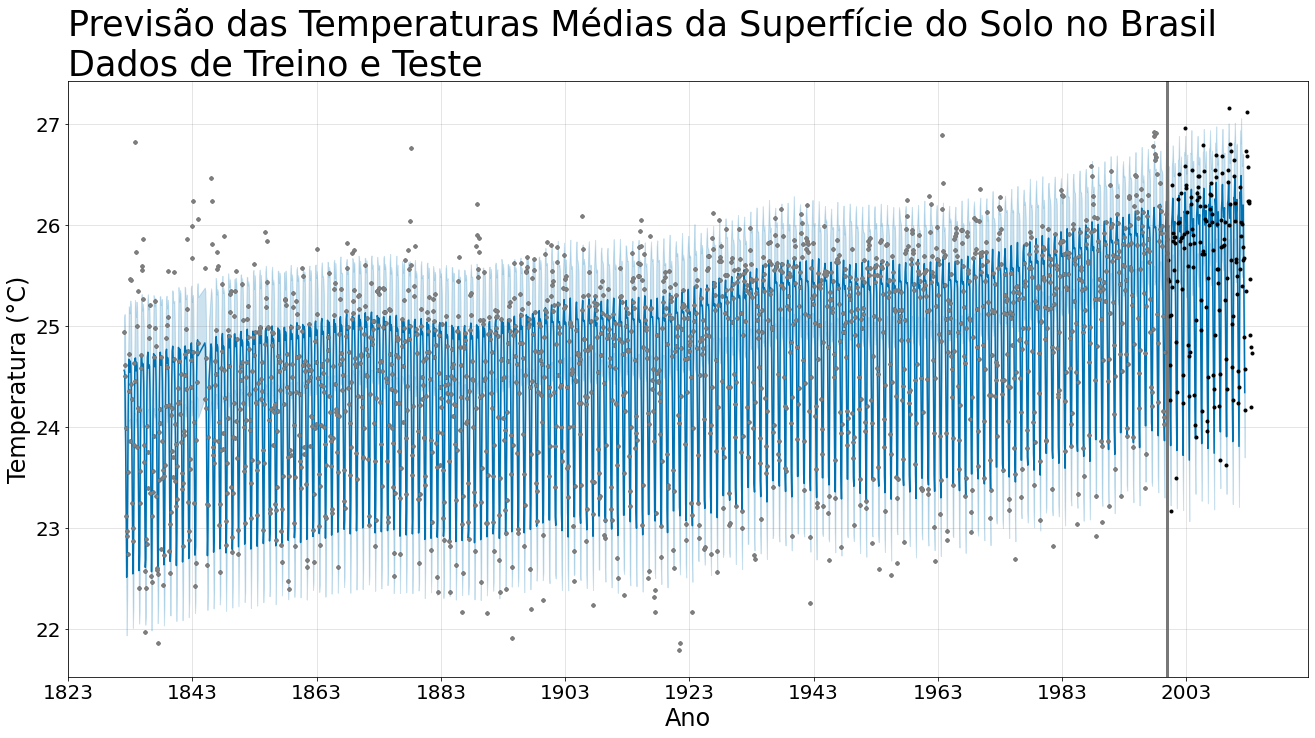

In [ ]:
fig = modelo.plot(previsao, figsize=(18,9));
ax = fig.add_subplot()
plt.title('Previsão das Temperaturas Médias da Superfície do Solo no Brasil \nDados de Treino e Teste', loc = 'left', fontsize = 35)
plt.plot(df_treino['ds'],df_treino['y'],'.',color='grey')
plt.plot(df_teste['ds'],df_teste['y'],'.',color='black')
ax.axvline(x=df_treino['ds'].max(), c='dimgray', lw=3, alpha=0.9, ls='-')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.show()

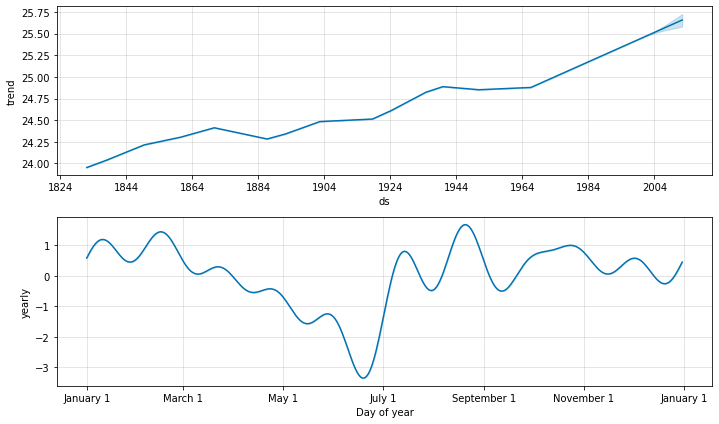

In [ ]:
modelo.plot_components(previsao, figsize=(10,6));

## Previsão de crescimento

In [ ]:
covid = pd.read_csv('https://github.com/allanspadini/livro-val-allan/blob/main/covid_sp.csv?raw=True')
covid.head(3)

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population,is_last,is_repeated
0,202205,2022-01-31,707,SP,São Paulo,3550308,city,976214,7920.45131,0,39352,0,0.0403,12325232,False,True
1,202205,2022-01-30,706,SP,São Paulo,3550308,city,976214,7920.45131,0,39352,0,0.0403,12325232,False,True
2,202204,2022-01-29,705,SP,São Paulo,3550308,city,976214,7920.45131,0,39352,0,0.0403,12325232,False,True


In [ ]:
covid['date'] = pd.to_datetime(covid['date'], format='%Y-%m-%d')

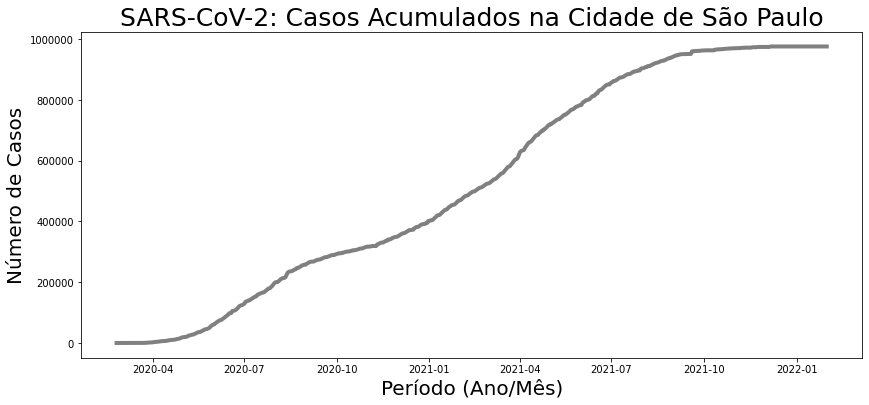

In [ ]:
fig, ax = plt.subplots(figsize = (14, 6))
sns.lineplot(x='date', y='last_available_confirmed', data=covid, linewidth = 4, color='grey')
plt.title('SARS-CoV-2: Casos Acumulados na Cidade de São Paulo', fontsize = 25)
plt.ylabel('Número de Casos', fontsize= 20)
plt.xlabel('Período (Ano/Mês)', fontsize= 20)
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

In [ ]:
df_covid = pd.DataFrame()
df_covid['ds'] = covid['date']
df_covid['y'] = covid['last_available_confirmed']

In [ ]:
df_covid['cap'] = 1000000
df_covid.head()

,ds,y,cap
0,2022-01-31,976214,1000000
1,2022-01-30,976214,1000000
2,2022-01-29,976214,1000000
3,2022-01-28,976214,1000000
4,2022-01-27,976214,1000000


In [ ]:
modelo = Prophet(growth='logistic')
modelo.fit(df_covid)
dataFramefuturo = modelo.make_future_dataframe(periods=30) 
dataFramefuturo['cap'] = 1000000
previsao = modelo.predict(dataFramefuturo)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8yl5obi8/o9cxay65.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8yl5obi8/yau25hmq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1878', 'data', 'file=/tmp/tmp8yl5obi8/o9cxay65.json', 'init=/tmp/tmp8yl5obi8/yau25hmq.json', 'output', 'file=/tmp/tmpeo9y5ksh/prophet_model-20220918170225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:02:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:02:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


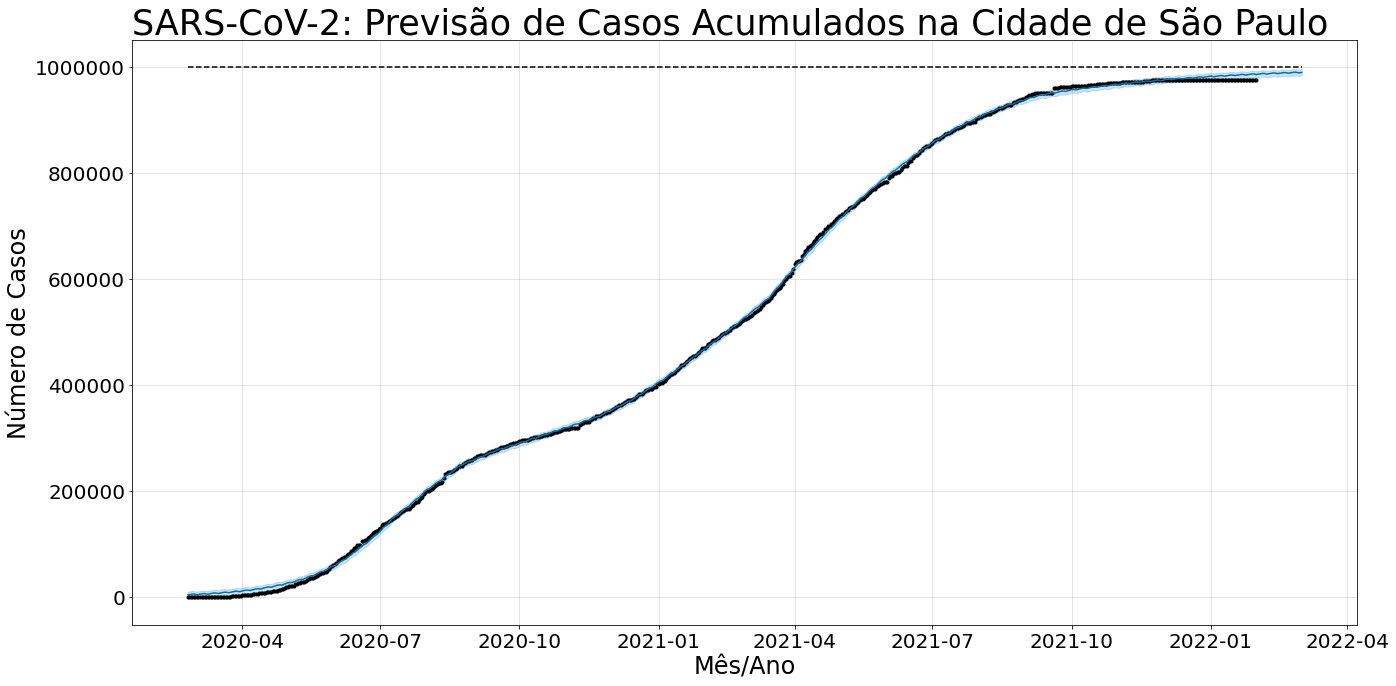

In [ ]:
modelo.plot(previsao, figsize=(18,9));
plt.title('SARS-CoV-2: Previsão de Casos Acumulados na Cidade de São Paulo', loc = 'left', fontsize = 35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Mês/Ano', fontsize=24)
plt.ylabel('Número de Casos', fontsize=24)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Changepoints

In [ ]:
from prophet.plot import add_changepoints_to_plot

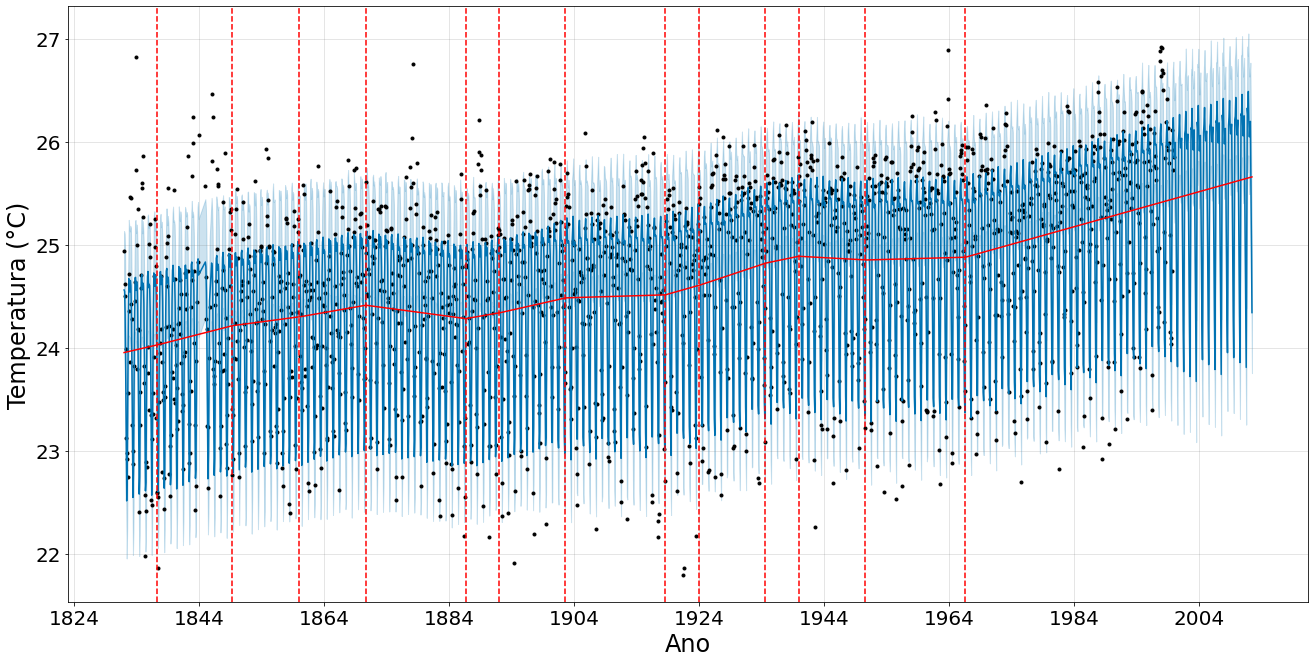

In [ ]:
fig = modelo.plot(previsao, figsize=(18,9));
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.show()

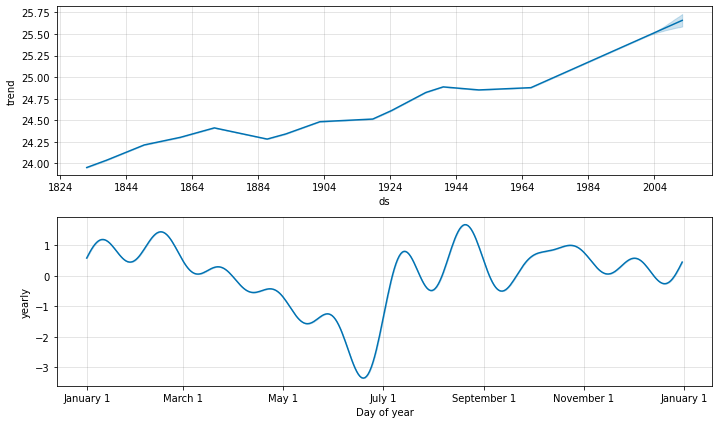

In [ ]:
modelo.plot_components(previsao, figsize=(10,6));

In [ ]:
modelo = Prophet(n_changepoints=5)
modelo.fit(df_treino)
dataFramefuturo = modelo.make_future_dataframe(periods=150, freq = 'M')
previsao = modelo.predict(dataFramefuturo)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8yl5obi8/ajolcesa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8yl5obi8/96tx_q6r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65442', 'data', 'file=/tmp/tmp8yl5obi8/ajolcesa.json', 'init=/tmp/tmp8yl5obi8/96tx_q6r.json', 'output', 'file=/tmp/tmp92_k01k3/prophet_model-20220918171349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:13:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:13:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


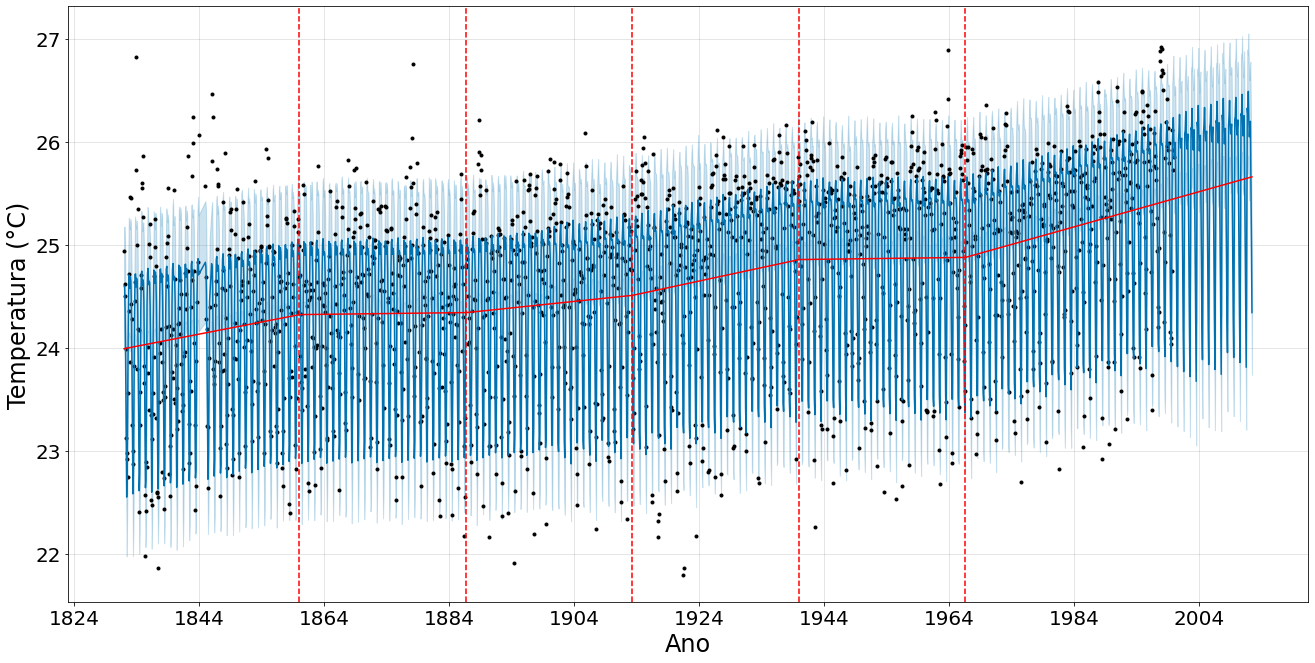

In [ ]:
fig = modelo.plot(previsao, figsize=(18,9));
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.show()

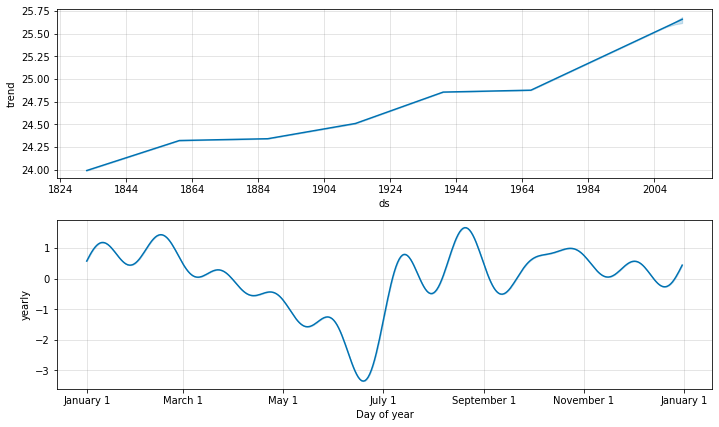

In [ ]:
modelo.plot_components(previsao, figsize=(10,6));

In [ ]:
modelo = Prophet(n_changepoints=5, changepoint_range=0.90)
modelo.fit(df_treino)
dataFramefuturo = modelo.make_future_dataframe(periods=150, freq = 'M')
previsao = modelo.predict(dataFramefuturo)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8yl5obi8/g481fb83.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8yl5obi8/0wr0gnab.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33444', 'data', 'file=/tmp/tmp8yl5obi8/g481fb83.json', 'init=/tmp/tmp8yl5obi8/0wr0gnab.json', 'output', 'file=/tmp/tmp7alwl9ut/prophet_model-20220918171420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:14:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:14:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


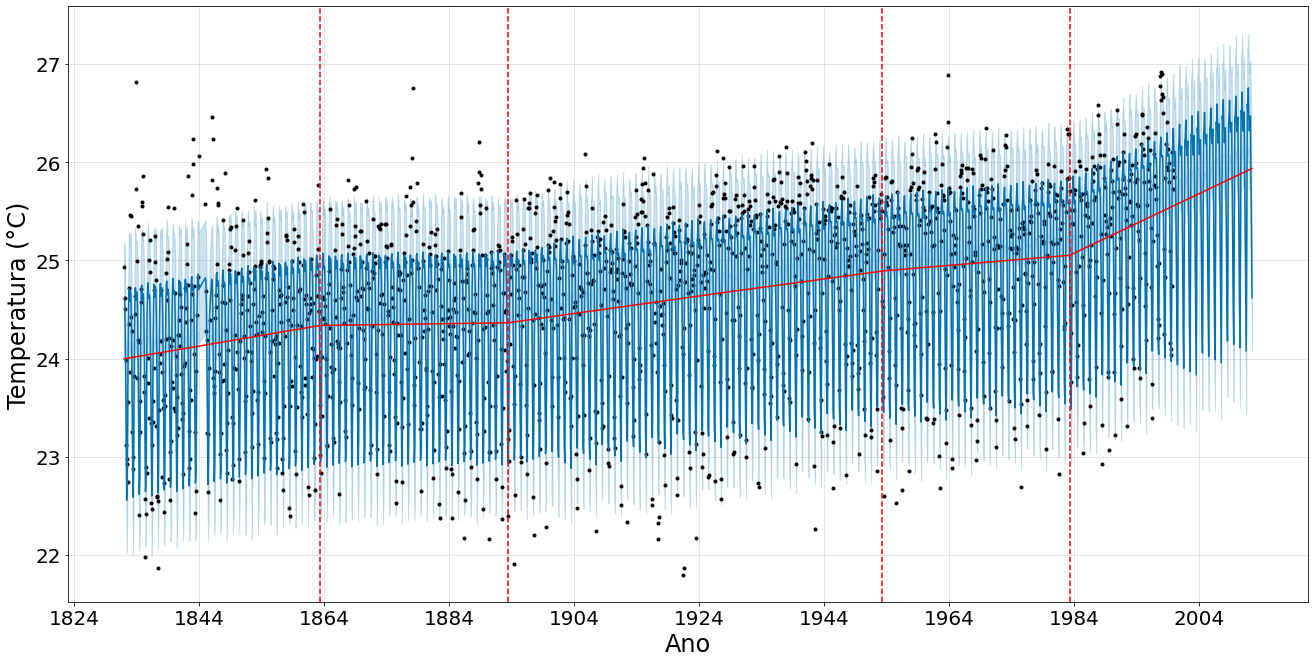

In [ ]:
fig = modelo.plot(previsao, figsize=(18,9));
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.show()

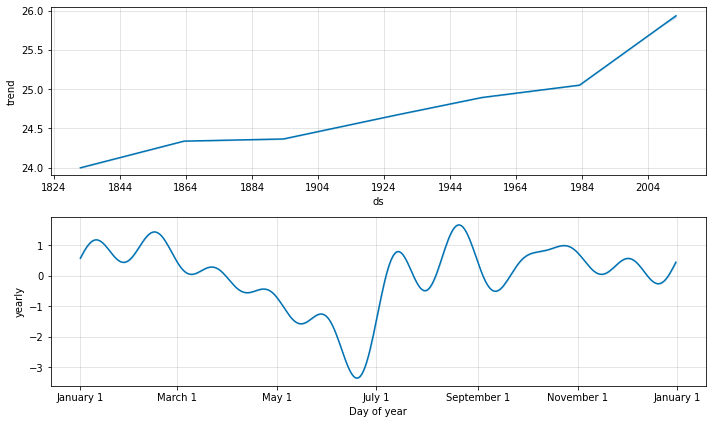

In [ ]:
modelo.plot_components(previsao, figsize=(10,6));

In [ ]:
modelo = Prophet(changepoint_prior_scale=10)
modelo.fit(df_treino)
dataFramefuturo = modelo.make_future_dataframe(periods=150, freq = 'M')
previsao = modelo.predict(dataFramefuturo)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8yl5obi8/628nsecg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8yl5obi8/2mb917ih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55327', 'data', 'file=/tmp/tmp8yl5obi8/628nsecg.json', 'init=/tmp/tmp8yl5obi8/2mb917ih.json', 'output', 'file=/tmp/tmptfb26piq/prophet_model-20220918171508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:15:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:15:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


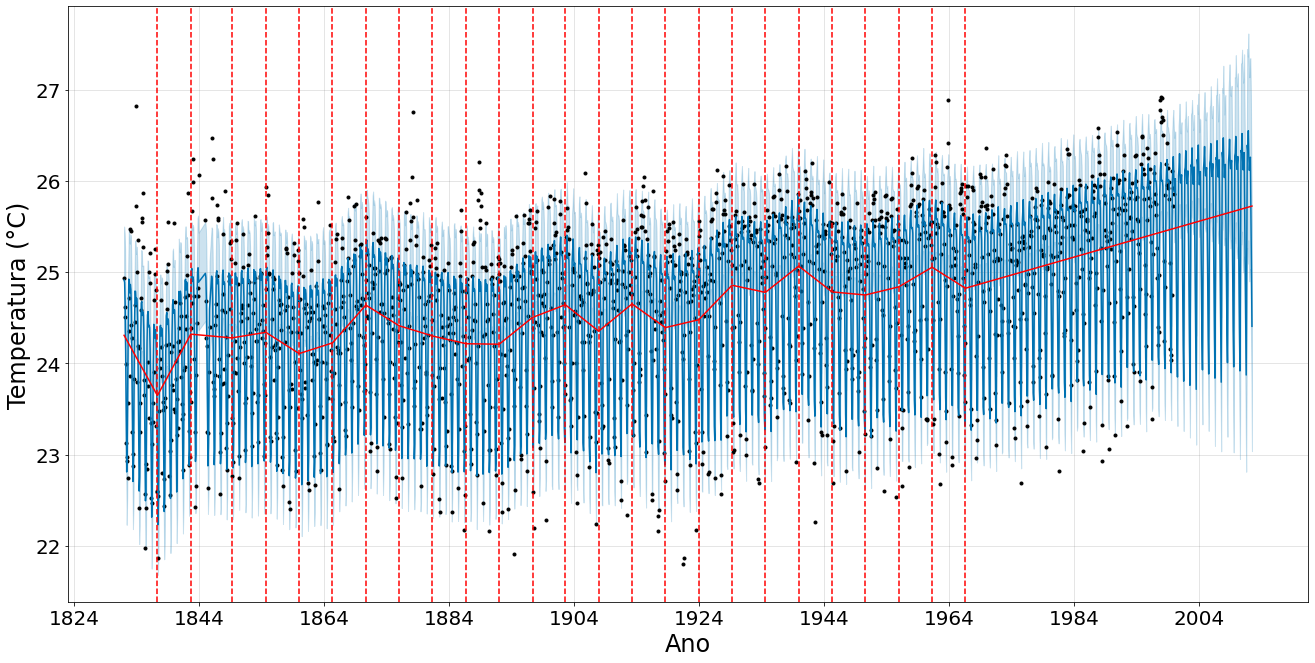

In [ ]:
fig = modelo.plot(previsao, figsize=(18,9));
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.show()

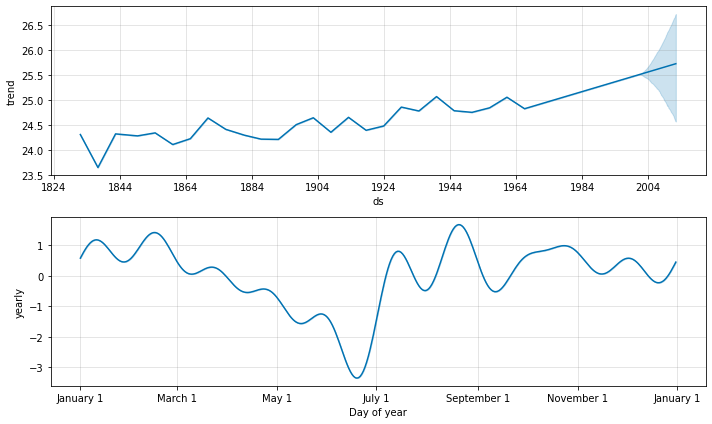

In [ ]:
modelo.plot_components(previsao, figsize=(10,6));

In [ ]:
modelo = Prophet(changepoints=['1980-01-01'])
modelo.fit(df_treino)
dataFramefuturo = modelo.make_future_dataframe(periods=150, freq = 'M')
previsao = modelo.predict(dataFramefuturo)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8yl5obi8/w5ercpft.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8yl5obi8/2lowpu31.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79638', 'data', 'file=/tmp/tmp8yl5obi8/w5ercpft.json', 'init=/tmp/tmp8yl5obi8/2lowpu31.json', 'output', 'file=/tmp/tmp7fcgnhrv/prophet_model-20220918171634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:16:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:16:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


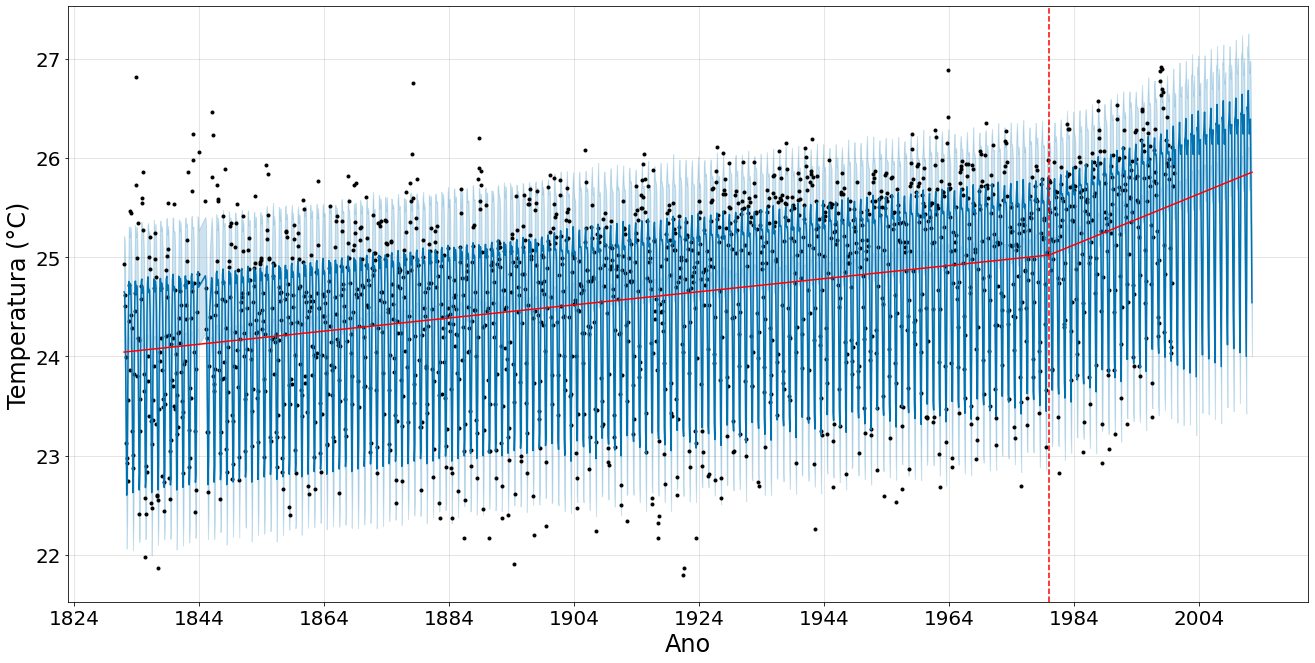

In [ ]:
fig = modelo.plot(previsao, figsize=(18,9));
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.show()

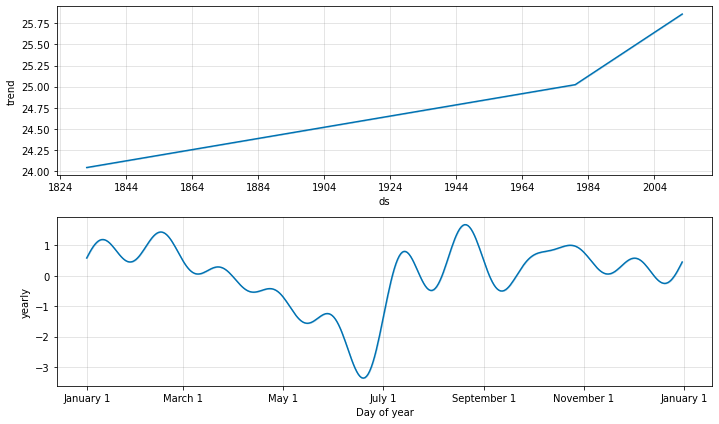

In [ ]:
modelo.plot_components(previsao, figsize=(10,6));